# Conjunto de datos: **Students' Academic Performance (Jan. 2026)**
> This dataset contains information related to students’ academic performance and key factors that may influence learning outcomes. It is designed for educational analysis, exploratory data analysis (EDA), and beginner-level data science projects.

> The dataset includes a mix of quantitative data (such as academic scores and study time) and qualitative data (such as test preparation status and demographic attributes). This combination makes it suitable for practicing data cleaning, grouping, comparison of averages, and basic visualization techniques.

> The primary goal of this dataset is to help learners explore questions like how study habits relate to performance across subjects, or whether certain preparation behaviors are associated with higher scores. The data is easy to understand, well-structured, and ideal for use in classrooms, Kaggle notebooks, or self-study projects.

From: https://www.kaggle.com/datasets/bchbchbchl/students-academic-performance-january-2026

## Problem

The problem to solve at hand is determining a student's Math score from the other features in the dataset. This makes it a **regression** problem.

I believe the remaining features will aid in making a fair prediction of the above mentioned variable. 

## Dataset Summary

This dataset includes students' scoring and their educational information, like study time and test preparation. 

In [129]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

If we look at the table information, we can see that there are columns with `null` (empty) values in the dataset.

In [130]:
data = pd.read_csv('./data.csv')
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student ID            7000 non-null   int64  
 1   Gender                7000 non-null   str    
 2   Race/Ethnicity        7000 non-null   str    
 3   Parental Education    6300 non-null   str    
 4   Lunch Type            6790 non-null   str    
 5   Test Preparation      7000 non-null   bool   
 6   Study Time per Week   6370 non-null   float64
 7   Daily Sleep Duration  6440 non-null   float64
 8   Math Score            7000 non-null   float64
 9   Reading Score         6510 non-null   float64
 10  Writing Score         6650 non-null   float64
 11  School Type           7000 non-null   str    
 12  Internet Access       6720 non-null   object 
dtypes: bool(1), float64(5), int64(1), object(1), str(5)
memory usage: 663.2+ KB


In [131]:
data

,Student ID,Gender,Race/Ethnicity,Parental Education,Lunch Type,Test Preparation,Study Time per Week,Daily Sleep Duration,Math Score,Reading Score,Writing Score,School Type,Internet Access
0,1,female,group B,some college,standard,False,12.4,5.4,62.0,76.0,65.0,public,True
1,2,male,group D,high school,standard,False,18.3,5.1,74.0,73.0,76.0,public,NaN
2,3,male,group B,bachelor degree,free/reduced,True,11.8,7.8,71.0,83.0,91.0,public,False
3,4,male,group E,high school,standard,False,NaN,7.3,83.0,73.0,52.0,public,True
4,5,female,group C,bachelor degree,standard,True,12.9,6.3,41.0,NaN,81.0,public,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,female,group C,some college,standard,True,3.5,6.8,74.0,NaN,50.0,private,False
6996,6997,female,group A,associate degree,free/reduced,True,10.8,7.3,82.0,52.0,81.0,public,True
6997,6998,female,group C,high school,standard,False,12.7,6.9,78.0,NaN,59.0,public,True
6998,6999,male,group D,high school,standard,True,15.1,8.1,62.0,63.0,79.0,public,True


Furthermore, some statistics on each column that could be aid in choosing relevant columns and filtering out those that would have no impact on the result

In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Student ID,7000.0,3500.500000,2020.870275,1.0,1750.75,3500.5,5250.25,7000.0
Study Time per Week,6370.0,9.662653,4.681971,0.0,6.40,9.6,12.80,26.1
Daily Sleep Duration,6440.0,7.193587,1.316991,3.0,6.30,7.2,8.10,11.0
Math Score,7000.0,69.476571,14.782909,3.0,59.00,70.0,80.00,100.0
Reading Score,6510.0,71.134101,13.818268,21.0,62.00,71.0,81.00,100.0
Writing Score,6650.0,70.460451,13.699283,14.0,61.00,71.0,80.00,100.0


The list of columns is the following:
- `Student ID`: Unique identifier for each student
- `Gender`: male, female
- `Race/Ethnicity`: The race or ethnicity of the student (grouped by)
- `Parental Education`: The highest education level of the student's parents
- `Lunch Type`: The lunch program this student took while in school. (free/reduced | standard)
- `Test Preparation`: Whether the student completed a test preparation course (True | False)
- `Study Time per Week`: Average amount of hours the user spent studying
- `Daily Sleep Duration`: Average daily sleep duration of the student in hours
- `Math Score`: Math exam score
- `Reading Score`: Reading exam score
- `Writing Score`: Writing exam score
- `School Type`: The type of school the student attended (private | public) 
- `Internet Access`: Whether the student had internet access (True | False)

We will ignore the `Student ID` as it is a distinct value and unique to each user; irrelevant to the prediction. 

## Numerical Features

The numerical features are:
- `Study Time per Week`
- `Daily Sleep Duration`
- `Reading Score`
- `Writing Score`

Looking at the distribution of these values will allow us to understand if these values hold any influence in this result at first glance.

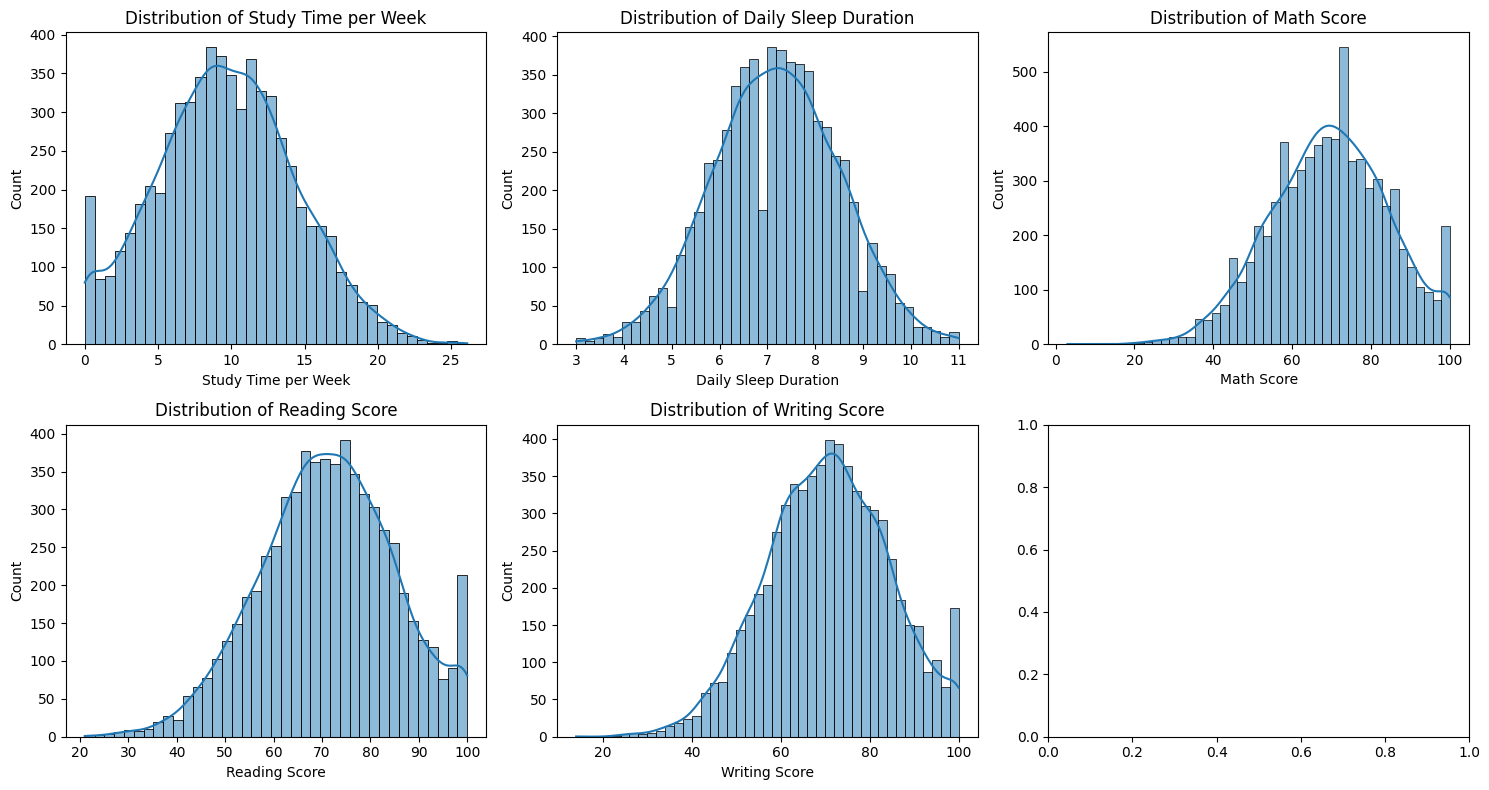

In [133]:
numerical_cols = ['Study Time per Week', 'Daily Sleep Duration', 'Math Score', 'Reading Score', 'Writing Score']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
numerical_cols.remove('Math Score')

Thankfully, these features are all approximately normally distributed, which means we do not need to apply any additional transformation aside from scaling (seemingly). 

More particularily:
- The Math Score distribution shows there are fixed scores students appear to spike at: ~70 and 100.
- This is the case for both Reading and Writing scores, with a spike at 100.
- Additionally, the same applies to Study Time per Week with 0 hours. This is to be expected, as students either study (the bell) or they don't (the outlying spike)
- Finally, Daily Sleep Duration also has a big dip at the left-most center of the bell.

Furthermore, there are assumptions to be made on the previous findings:
- Spikes at 100 are expected from the ceiling effect or maximum score.
- Spikes at ~70 are likely due to rounding or a standarized score.
- These maximum scores cause a right-skew distortion and, hence, a reduced variance at the top end.

## Categorical Features

The categorical features are:
- `Gender`
- `Race/Ethnicity`
- `Parental Education`
- `Lunch Type`
- `Test Preparation`
- `School Type`
- `Internet Access`

Once again, we will create a visualization graph for each one of these features to understand their relevance more. Particularily, we will use a *countplot* to do so.

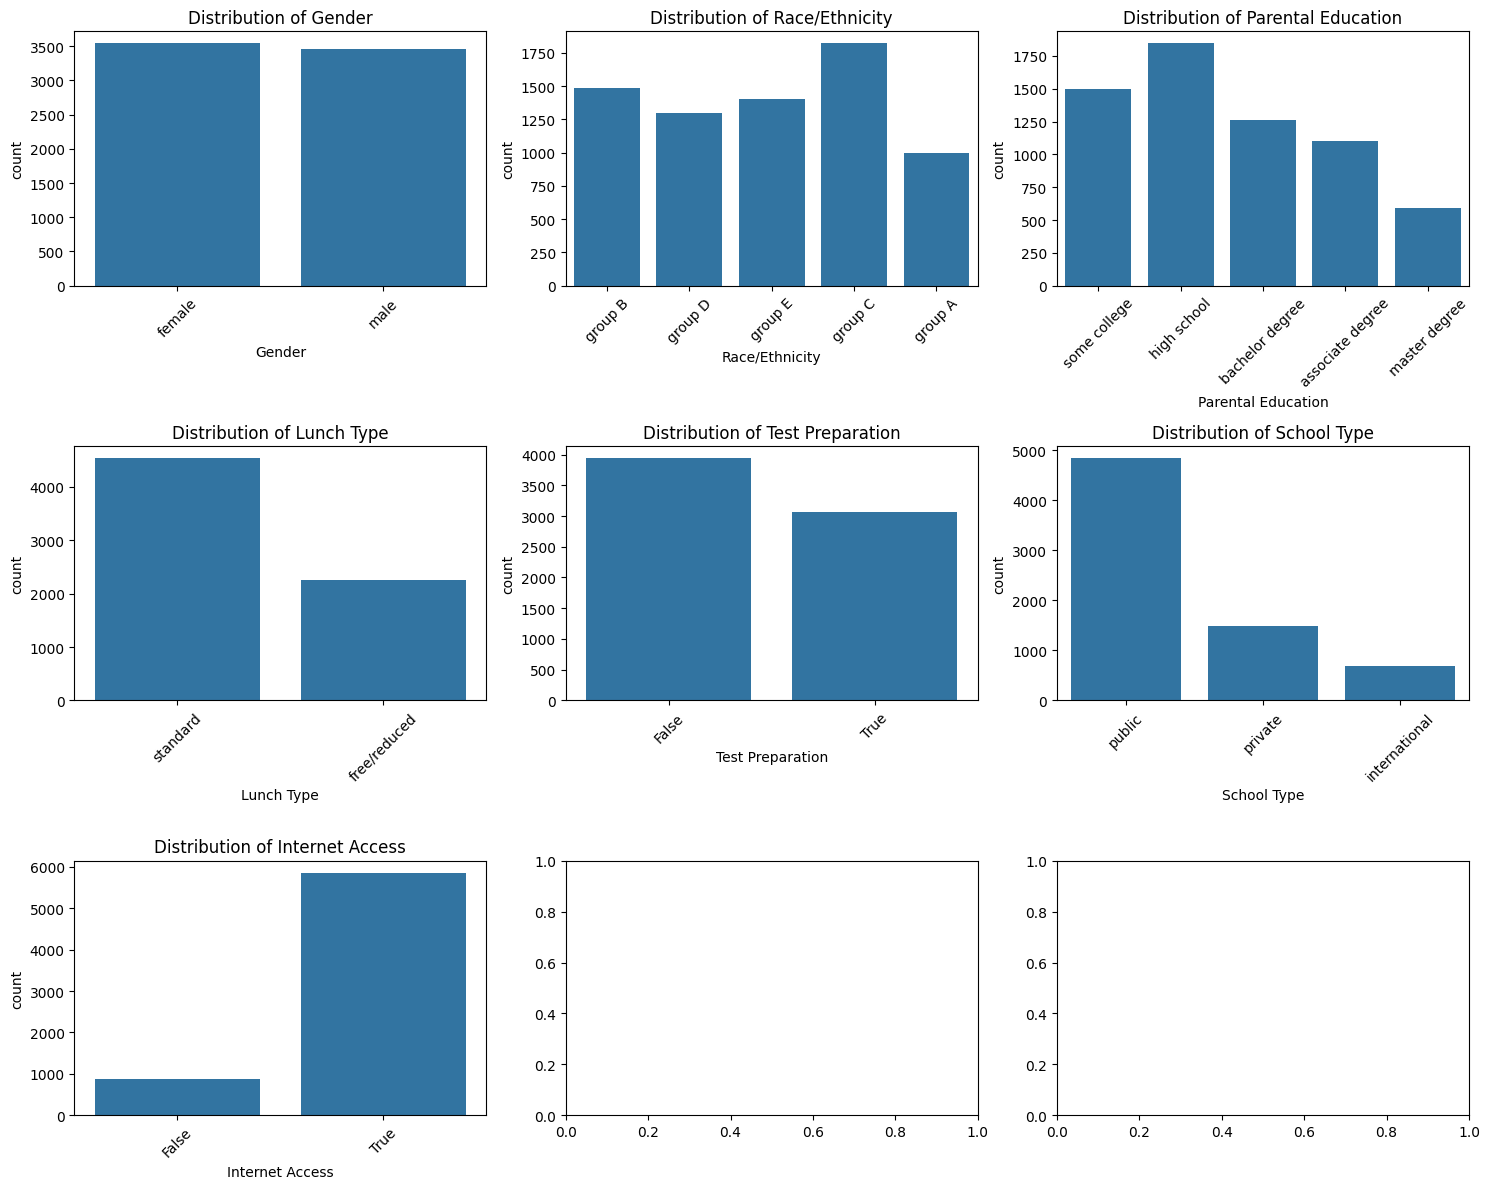

In [134]:
categorical_cols = ['Gender', 'Race/Ethnicity', 'Parental Education', 'Lunch Type', 'Test Preparation', 'School Type', 'Internet Access']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

The observations to be made are:
- Gender is almost evenly represented
- `Race/Ethnicity` has an uneven distribution
- `Parental Education` is skewed toward mid-level education.
- The vast majority of the samples have a positive `Internet Access`. 

Which allows us to assume:
- This dataset is balanced by gender, reducing the risk of gender-driven sampling bias
- There is underrepresentation in: `Race/Ethnicity`, 
- `Internet Access` might have less entropy, probably a weak predictor.


Moreover, it is safe to assume `Parental Education` can use ordinal encoding rather than one-hot, because it is an ordered set of labels, contrary to unordered ones like race or school type.

## Target

The target for this model is `Math Score`. As of now, aside from `Student ID`, all other columns appear to be relevant in predicting the result. There is one exception to this: `Internet Score`, as it is a weaker indicator due to its dominant distribution. However, it is in our best interest to confirm this by comparing the features against the target to understand this behavior better.

Let's once again look at the target distribution:

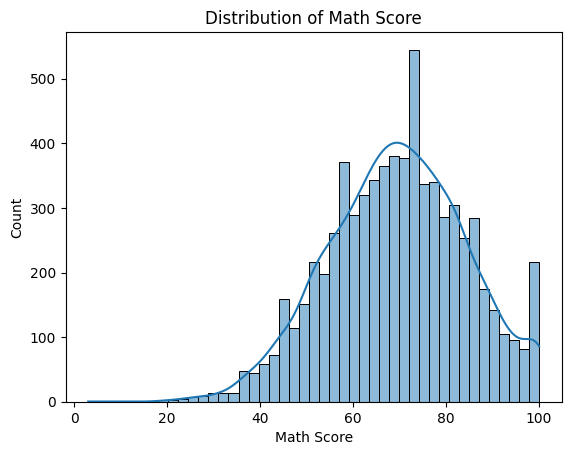

In [135]:
sns.histplot(data['Math Score'].dropna(), kde=True)
plt.title('Distribution of Math Score')
plt.show()

Then we can plot the numerical features against the Math Score to find any interesting behaviors. We are using Hexbin plots because we are working with a high-density dataset and a numerical target, and hexbins are good at showing density and clustering. 

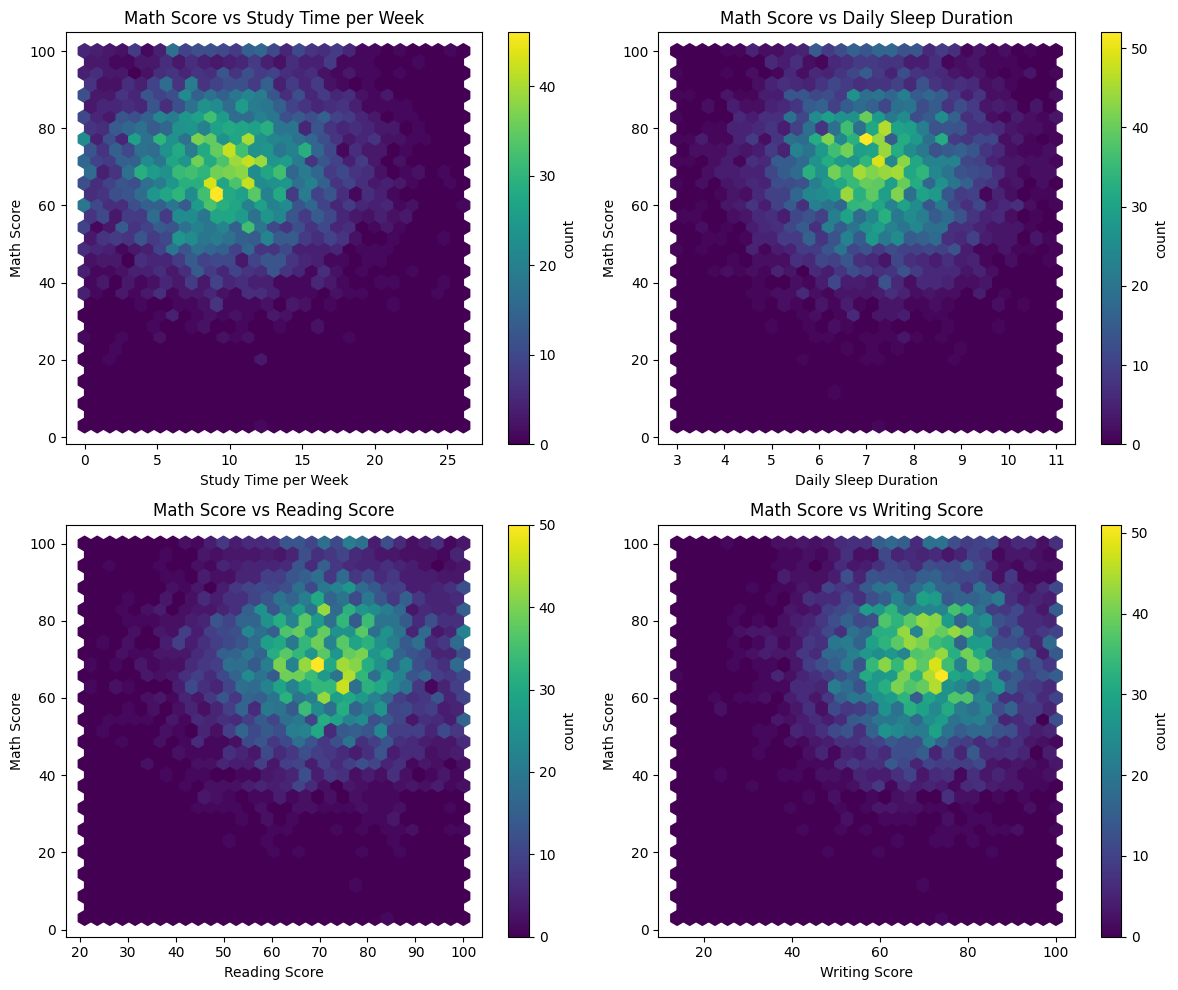

In [136]:
n = len(numerical_cols)
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    hb = axes[i].hexbin(
        data[col],
        data["Math Score"],
        gridsize=30
    )
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Math Score")
    axes[i].set_title(f"Math Score vs {col}")
    fig.colorbar(hb, ax=axes[i], label="count")

# remove unused
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

These hexbin plots indicate moderate relationships between the Math Score and the numerical features, stemmed from the clustering within the graphs.

- `Study Time per Week` shows a small positive relationship at low to moderate values, with a diminishing return after 10–12 hours.
- `Daily Sleep Duration` shows a cluster around 6–9 hours, corresponding to mid-to-high math performance. This suggests an optimal range rather for sleep, rather than a linear increase.
- `Reading Score` and `Writing Score` display positive relationships with the target. This is to be assumed, as academic skill could be transfered over from one subject to another.

In general, both other subject scores seem to have a strong prediction capability with the target, while the other two features show more interesting behaviors, with an optimal study time and daily sleep range for best Math Score.

Following, the categorical values are to be plotted against the target to understand *their* relationships with the target too.

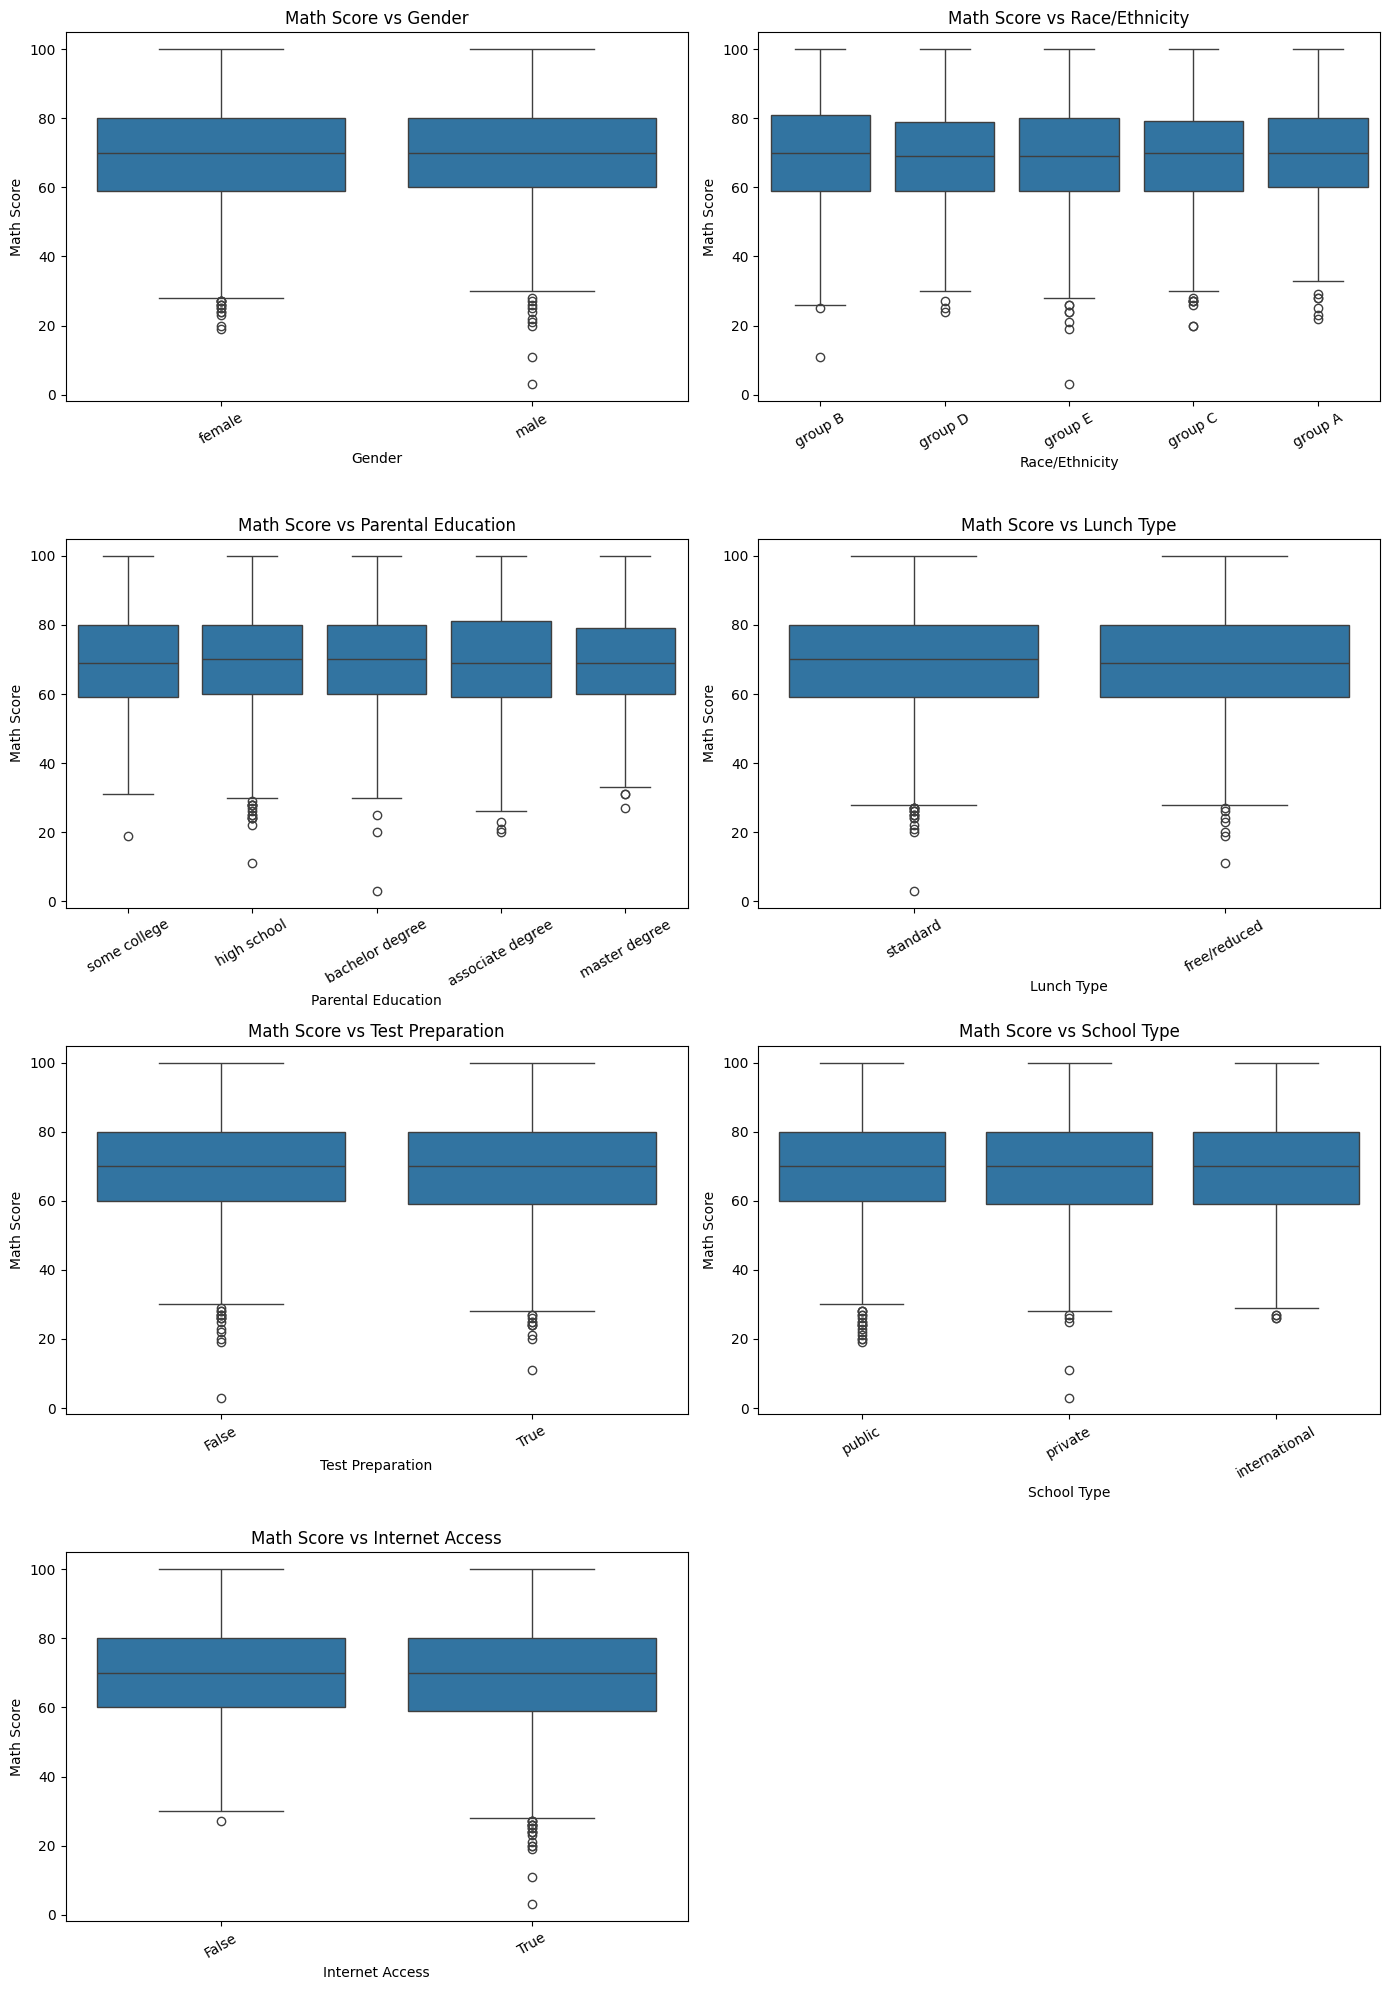

In [137]:
n = len(categorical_cols)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(
        x=data[col],
        y=data["Math Score"],
        ax=axes[i]
    )
    axes[i].set_title(f"Math Score vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Math Score")
    axes[i].tick_params(axis="x", rotation=30)

# remove unused
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Similar to numerical features, we can make some observations and assumptions from these relationships:

- `Gender` categories show nearly identical results. This suggests this feature is practically irrelevant when it comes to prediction, due to the overlap.
- This is the case for the rest of the other categorical features. However, some categories display outliers and medians with some variation, indicating some possible relationship. 

Overall, these distributions appear to be mostl overlapping, indicatin a weak association with the target, and there is no single independent feature that explains the Math Score. 

## Correlation Matrix

As some features showed no relevance, we can investigate this further with a correlation matrix.

We can first start with the numerical features:

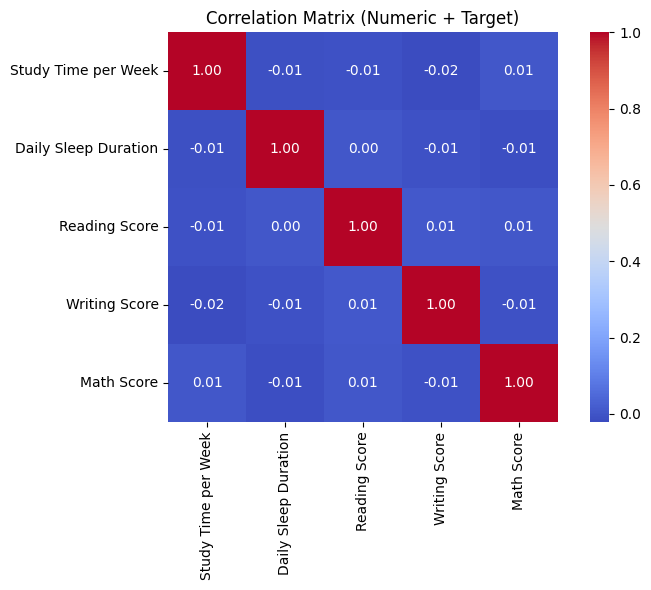

In [138]:
numeric_with_target = data[numerical_cols + ['Math Score']]
corr = numeric_with_target.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Numeric + Target)")
plt.tight_layout()
plt.show()

Then one with the categorical features (one-hot encoded):

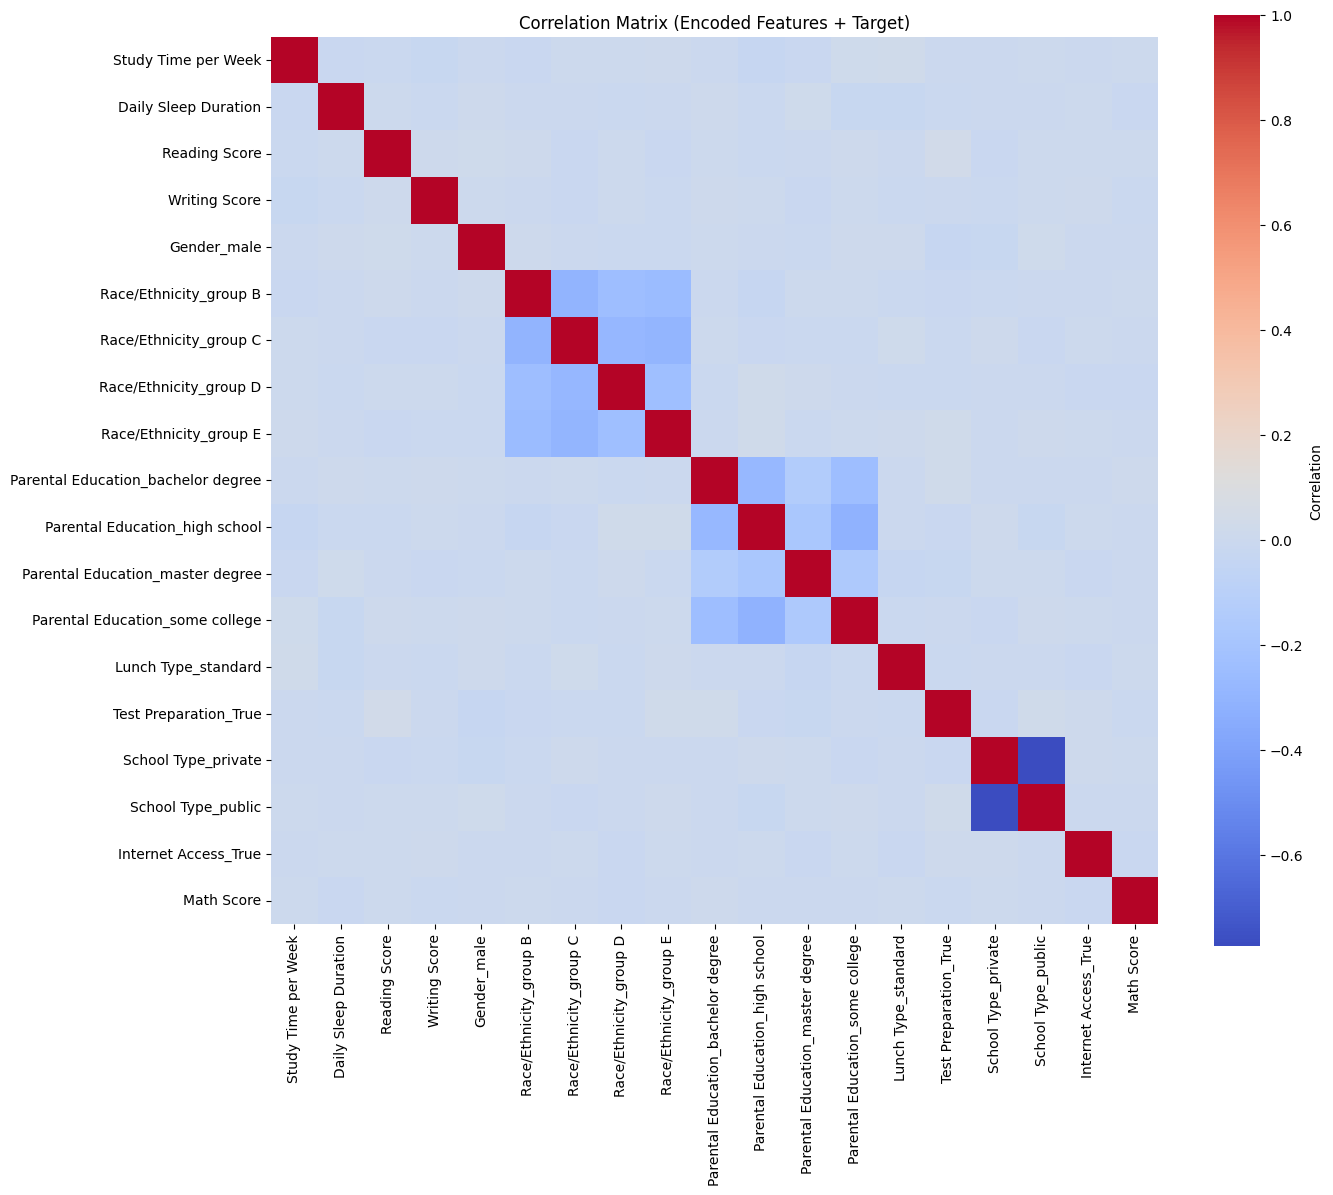

In [139]:
X = data[categorical_cols + numerical_cols]
y = data['Math Score']

# encode categorical features
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)

corr_encoded = pd.concat([X_encoded, y], axis=1).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_encoded, annot=False, cmap="coolwarm", square=True, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix (Encoded Features + Target)")
plt.tight_layout()
plt.show()


From both of these Correlation Matrices we get the following takeaways:
- Math Score has near-zero correlation with the numerical features
- The relationships in the categorical matrix are strictly mutually exclusive categories, so by nature there exists a relationship.

These results are similar to what we discerned from the hexbins: there is a WEAK *LINEAR* relationship with between the target and the parameters.

It is important to emphasize that this means there is lack of **LINEARITY** in those relationships, not that there aren't any in the first place.

## Missing Values

Before a pipeline is created, we have to handle missing (`null` | empty) avlues in the set. Which we mentioned in the start of this notebook.

<Axes: >

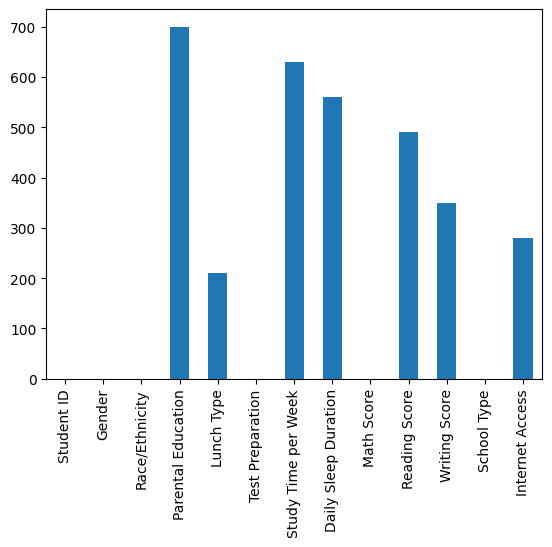

In [140]:
null_count = data.isnull().sum()
null_count.plot(kind='bar')

Or we can show this by percentage per column and absolute count

In [141]:
null_percent = (data.isnull().mean() * 100).sort_values(ascending=False)
null_count_sorted = data.isnull().sum().sort_values(ascending=False)

null_summary = pd.DataFrame({
    'Percentage %': null_percent,
    'Absolute Count': null_count_sorted
})
print(null_summary)

                      Percentage %  Absolute Count
Parental Education            10.0             700
Study Time per Week            9.0             630
Daily Sleep Duration           8.0             560
Reading Score                  7.0             490
Writing Score                  5.0             350
Internet Access                4.0             280
Lunch Type                     3.0             210
Student ID                     0.0               0
Race/Ethnicity                 0.0               0
Gender                         0.0               0
Test Preparation               0.0               0
Math Score                     0.0               0
School Type                    0.0               0


We can see that there is a significant amount of data missing. 

For all of thes cases, we can impute to fill the empty spots. We will not drop any column as we have a low % null count for all of them.
- `Parental Education`: most-frequent imputation
- `Study Time per Week`: median imputation (we don't want to force zero values, as they skew the result)
- `Daily Sleep Duration`: median imputation
- `Reading Score`: median imputation
- `Writing Score`: median imputation
- `Internet Access`: most-frequent imputation
- `Lunch Type`: most-frequent imputation

We chose median imputation for most of these columns because of the normal distribution and the presence of outliers and how outliers strongly affect this distribution.

## Key Findings

Through the exploratory analysis of this dataset, several important findings have been discovered that will guide the development of the prediction model.

- There is a **weak linear relationship** between each singular feature and the target Math Score. This is evidenced by the low correlations observed in the matrices. However, this does not indicate an absence of relationships, but rather the presence of **non-linear relationships** and interaction effects between variables.
- The most promising features are Reading Score and Writing Score, which show a moderate positive relationship with the target. This suggests that academic skills transfer across subjects. 
- Additionally, optimal patterns were identified: there is an ideal range of 6-9 hours of daily sleep and a curve of diminishing returns after 10-12 hours of weekly study time.

Regarding categorical features, most show significant overlap in their Math Score distributions

- Particularly Gender, which is practically irrelevant for prediction.
- Internet Access also presents little predictive utility due to its dominant distribution.
- On the other hand, the dataset presents missing values (less than 10% in all columns), which will be imputed using appropriate strategies.
- The presence of ceilings in scores (spikes at 70 and 100) suggests that the model will need to be adapt to this variance at the upper extremes. 

Finally, the nature of the problem indicates that a regression model capable of capturing complex interactions will be necessary for effective Math Score prediction.

## Preprocessing Pipelines

Given the previous analysis of the dataset, a preprocessing piple can be built to feed in the inputs into the model created in a later cell.

We will use a `ColumnTransfer` to distinctively transform each column independently, both numerical and categorical values. Because we're using a `ColumnTransformer`, each transformation is a pipeline itself, created using `make_pipline`.

Particularily, the transformations used are the following:
- `Parental Education`: `SimpleImputer` with `most_frequent` strategy and `OrdinalEncoder` because this is increasing education level.
- `Gender`: `OneHotEncoder` because it's categorical
- `Race/Ethnicity`: `OneHotEncoder` because it's categorical
- `Lunch Type`: `OneHotEncoder` because it's categorical
- `Study Time per Week`: `SimpleImputer` with `median` strategy.
- `Daily Sleep Duration`: `SimpleImputer` with `median` strategy.
- `Reading Score`: `SimpleImputer` with `median` strategy. 
- `Writing Score`: `SimpleImputer` with `median` strategy.
- `School Type`: `SimpleImputer` with `most_frequent` strategy. `OneHotEncoder` because it's categorical.
- `Test Preparation`: `FunctionTransformer` to convert the values to string.
- `Internet Access`: `SimpleImputer` with `most_frequent` strategy and `FunctionTransformer` to convert the values to string before they are classified.
- Any remaining columns will be passed through. 

In [142]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
import numpy as np

def to_string(X):
    return X.astype(str)

preprocessor = ColumnTransformer(
    transformers=[
        (
            'parental_education',
            make_pipeline(
                SimpleImputer(strategy='most_frequent'),
                OrdinalEncoder(
                    categories=[[
                        'high school',
                        'some college',
                        'associate degree',
                        'bachelor degree',
                        'master degree'
                    ]],
                    handle_unknown='use_encoded_value',
                    unknown_value=-1
                )
            ),
            ['Parental Education']
        ),

        (
            'gender',
            make_pipeline(
                OneHotEncoder(handle_unknown='ignore')
            ),
            ['Gender']
        ),

        (
            'race',
            make_pipeline(
                OneHotEncoder(handle_unknown='ignore')
            ),
            ['Race/Ethnicity']
        ),

        (
            'lunch',
            make_pipeline(
                OneHotEncoder(handle_unknown='ignore')
            ),
            ['Lunch Type']
        ),

        (
            'school',
            make_pipeline(
                SimpleImputer(strategy='most_frequent'),
                OneHotEncoder(handle_unknown='ignore')
            ),
            ['School Type']
        ),

        (
            'test_prep',
            make_pipeline(
                FunctionTransformer(to_string),
                SimpleImputer(strategy='constant', fill_value='False'),
                OneHotEncoder(handle_unknown='ignore')
            ),
            ['Test Preparation']
        ),

        (
            'internet',
            make_pipeline(
                FunctionTransformer(to_string),
                SimpleImputer(strategy='constant', fill_value='False'),
                OneHotEncoder(handle_unknown='ignore')
            ),
            ['Internet Access']
        ),

        (
            'numerical',
            make_pipeline(
                SimpleImputer(strategy='median'),
                StandardScaler()
            ),
            [
                'Study Time per Week',
                'Daily Sleep Duration',
                'Reading Score',
                'Writing Score'
            ]
        )
    ],
    remainder='drop'
)

Once the preprocessing pipeline is in place, we must define the feature matrix `x` and target vector `y`.

This allows us to create a raining and testing set, for which we will use an 80-20 split. 

We cannot stratify because we are working with a continuous target and not discrete classes.

In [143]:
x = data[categorical_cols + numerical_cols]
y = data['Math Score']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
)

Following the splitting of the dataset, we can pass the data through the preprocessing pipline, for which we can use `fit_transform` to apply the transformations.

`fit_transform` for the feature matrix, `transform` on the testing data.

In [144]:
x_train_processed = preprocessor.fit_transform(x_train)
x_train_processed

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         8.75535626e-01,  7.42651395e-01, -3.36957355e-01],
       [ 3.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -9.47523828e-01, -1.56985030e+00, -1.30226884e+00],
       [ 4.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.35111635e+00, -7.79137237e-02,  1.08571022e-01],
       ...,
       [ 2.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         3.63762639e-03,  8.17248224e-01, -4.11212084e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -7.09733464e-01, -8.98478843e-01, -1.22801411e+00],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -5.51206555e-01, -7.79137237e-02,  3.43162929e-02]],
      shape=(5600, 22))

In [145]:
x_test_processed = preprocessor.transform(x_test)
x_test_processed

array([[ 2.        ,  1.        ,  0.        , ..., -0.07562583,
         0.81724822, -0.93099519],
       [ 2.        ,  0.        ,  1.        , ..., -0.55120656,
        -0.45089787,  1.51941088],
       [ 2.        ,  1.        ,  0.        , ...,  0.00363763,
         0.44426408,  0.40558994],
       ...,
       [ 1.        ,  1.        ,  0.        , ...,  1.82669708,
        -0.00331689, -1.30226884],
       [ 3.        ,  1.        ,  0.        , ..., -1.18531419,
         2.15999115,  0.18282575],
       [ 0.        ,  0.        ,  1.        , ..., -1.89868528,
        -1.27146299, -0.708231  ]], shape=(1400, 22))

## Classification Model

Upon processing our input and output data for testng, the classification model can be built. This will be a `regression` model as the value we are trying to predict is of a continuous nature. 

We will create a pipeline that combines both the preprocessing pipeline we made and the regression model we are trying to make. We can do this with `make_pipeline`.

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = make_pipeline(
    preprocessor,
    LinearRegression()
)

`model` is now the full pipeline, comprised of both the preprocessing steps and the final linear regression model. 

In [147]:
model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('parental_education', ...), ('gender', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the 

To fit the model using the training data we can use `fit`.

In [148]:
model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('parental_education', ...), ('gender', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the 

The model is now trained, and we can use it to predict the test set using `predict`.

In [149]:
y_test_pred = model.predict(x_test)
y_test_pred

array([69.67447533, 69.66668047, 69.26577625, ..., 68.80318033,
       70.81972853, 70.35963543], shape=(1400,))

And, of course, we need to evaluate these results to measure the model's performance.

In [150]:
x_test['Math Score Predicted'] = y_test_pred
x_test['Math Score Actual'] = y_test.values
x_test

,Gender,Race/Ethnicity,Parental Education,Lunch Type,Test Preparation,School Type,Internet Access,Study Time per Week,Daily Sleep Duration,Reading Score,Writing Score,Math Score Predicted,Math Score Actual
6500,female,group D,associate degree,standard,False,public,False,18.2,7.1,82.0,58.0,69.674475,80.0
2944,male,group C,associate degree,standard,False,public,True,10.6,6.5,65.0,91.0,69.666680,49.0
2024,female,group B,associate degree,standard,True,public,True,5.8,7.2,77.0,76.0,69.265776,99.0
263,male,group E,some college,free/reduced,False,public,True,15.9,7.4,93.0,72.0,69.354130,61.0
4350,male,group C,bachelor degree,free/reduced,False,public,True,8.0,5.2,NaN,70.0,70.335844,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,female,group E,some college,standard,False,public,True,8.8,7.2,60.0,NaN,69.331980,51.0
1860,male,group B,bachelor degree,standard,False,public,False,10.9,5.9,56.0,76.0,70.115754,84.0
4974,female,group E,some college,free/reduced,False,public,True,15.6,9.5,NaN,53.0,68.803180,75.0
387,female,group B,bachelor degree,standard,False,international,False,11.9,5.7,100.0,73.0,70.819729,64.0


In [151]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R2: -0.0054
MAE: 11.9784
RMSE: 14.7730


In [152]:
data.corr(numeric_only=True)['Math Score'].sort_values(ascending=False)


Math Score              1.000000
Study Time per Week     0.005473
Reading Score           0.005297
Student ID             -0.003274
Writing Score          -0.006610
Test Preparation       -0.008433
Daily Sleep Duration   -0.014456
Name: Math Score, dtype: float64